<a href="https://colab.research.google.com/github/quddaz/Machine_Learing/blob/main/8%EC%9E%A5/8-1%2C2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 이미지를 위한 인공 신경망

## 합성곱

+ 합성곱 : 입력 데이터에 도장을 찍어서 유용한 특성만 드러나게 하는 것이라고 생각할 수 있다.
+ 인공신경망은 처음에 가중치와 절편을 랜덤하게 초기화한 다음 에포크를 반복하면서 경사 하강법 알고리즘을 사용하여 손실이 낮아지도록 최적의 가중치와 절편을 찾는 것을 모델 훈련이라 한다.



> 합성곱

+ 밀집층의 계산과 달리 입력 데이터 전체의 가중치를 적용하는 것이 아니라 일부에 가중치를 곱한다.
+ 합성곱은 1차원이 아니라 2차원 입력에도 적용이 가능하다.
+ 입력이 2차원 배열이면 필터도 2차원이어야 한다.
+ 커널의 크기는 하이퍼파라미터이다.
+ 마치 도장을 찍듯이 왼쪽 위에서 오른쪽 맨 아래쪽까지 이동하면서 출력을 만든다.
+ 계싼식은 밀집층과 거의 같다.





> 케라스 합성곱 층



In [ ]:
from tensorflow import keras
keras.layers.Conv2D(10, kernel_size(3,3), activation='relu')



> **패딩**

+ 모서리의 이미지는 특성 합으로 잘 전달되지 않는다.
+ 패딩은 모서리의 정보를 사용하는 비율을 올려준다.



In [ ]:
keras.layers.Conv2D(10, kernel_size=(3,3), activation='relu', padding='same') #padding



> **스트라이드**

+ 합성곱에서 상하좌우로 이동하는 크기를 의미한다.
+ 기본은 1이다. *이탤릭체 텍스트*



In [ ]:
keras.layers.Conv2D(10, kernel_size=(3,3), activation='relu', padding='same', strides=1) #스트라이드 1로 설정



> **풀링**

+ 풀링은 합성곱 중에서 만든 특성 맵의 가로세로 크기를 줄인다.
+ 특성맵의 개수를 줄이지는 않는다.
+ 최대 풀링: 도장 영역에서 최대값을 구한다.
+ 평균 풀링: 도장 영역에서 평균 값을 구한다.



In [ ]:
keras.layers.MaxPooling2D(2) # 풀링의 크기
keras.layers.MaxPooling2D(2, strides=2, padding='valid') #풀링 = 2, 스트라이드 = 2, 패딩 = 기본값

## 8-2 합성곱 신경망을 사용한 이미지 분류

### 패션 MNIST 데이터

In [1]:

from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

4422102/4422102 [==============================] - 1s 0us/step




> **<합성곱 신경망 만들기>**
+ 합성곱 신경망의 구조: 합성곱 층으로 이미지에서 특징을 감지한 후 밀집층으로 클래스에 따른 분류 확률을 계산한다.




In [11]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
          padding='same', input_shape=(28,28,1))) # 32개의 필터, 커널(3,3), 렐루함수, 세임패딩, 입력차원 지정
model.add(keras.layers.MaxPooling2D(2)) # (2,2) 풀링, 최대 풀링

In [12]:
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu',padding='same'))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [13]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 3136)              0         
                                                                 
 dense_4 (Dense)             (None, 100)              

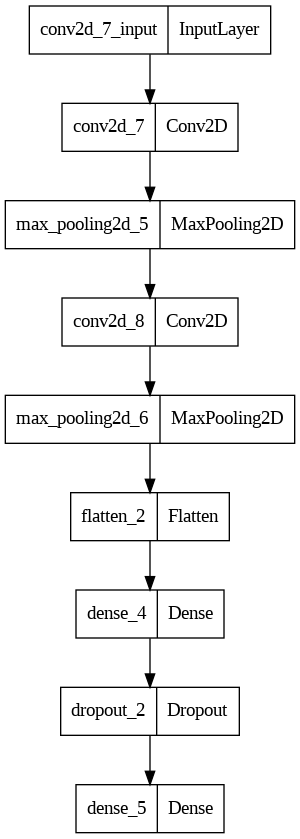

In [14]:
keras.utils.plot_model(model)

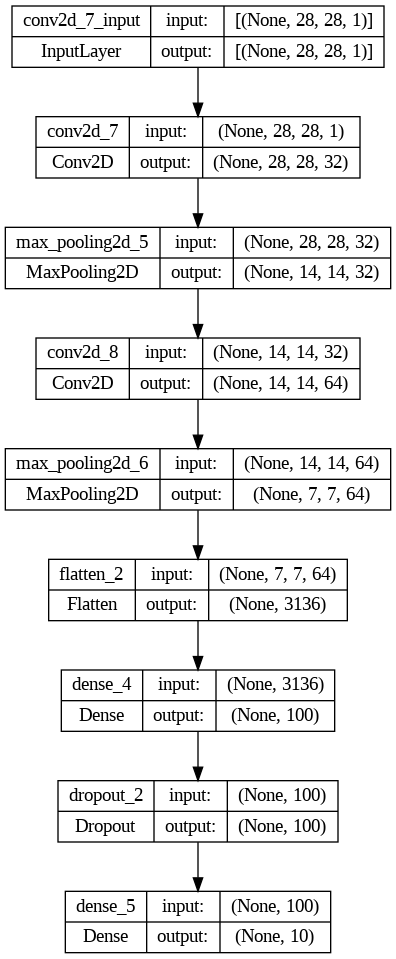

In [15]:

keras.utils.plot_model(model, show_shapes=True)

In [16]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 88s 58ms/step - loss: 0.5144 - accuracy: 0.8180 - val_loss: 0.3294 - val_accuracy: 0.8821
Epoch 2/20
   3/1500 [..............................] - ETA: 56s - loss: 0.3706 - accuracy: 0.8646 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 65s 44ms/step - loss: 0.3390 - accuracy: 0.8782 - val_loss: 0.2798 - val_accuracy: 0.8974
Epoch 3/20
1500/1500 [==============================] - 74s 49ms/step - loss: 0.2924 - accuracy: 0.8945 - val_loss: 0.2587 - val_accuracy: 0.9022
Epoch 4/20
1500/1500 [==============================] - 84s 56ms/step - loss: 0.2618 - accuracy: 0.9043 - val_loss: 0.2407 - val_accuracy: 0.9111
Epoch 5/20
1500/1500 [==============================] - 66s 44ms/step - loss: 0.2375 - accuracy: 0.9115 - val_loss: 0.2322 - val_accuracy: 0.9133
Epoch 6/20
1500/1500 [==============================] - 65s 43ms/step - loss: 0.2154 - accuracy: 0.9197 - val_loss: 0.2330 - val_accuracy: 0.9156
Epoch 7/20
1500/1500 [==============================] - 70s 47ms/step - loss: 0.1977 - accuracy: 0.9265 - val_loss: 0.2325 - val_accuracy: 0.9227


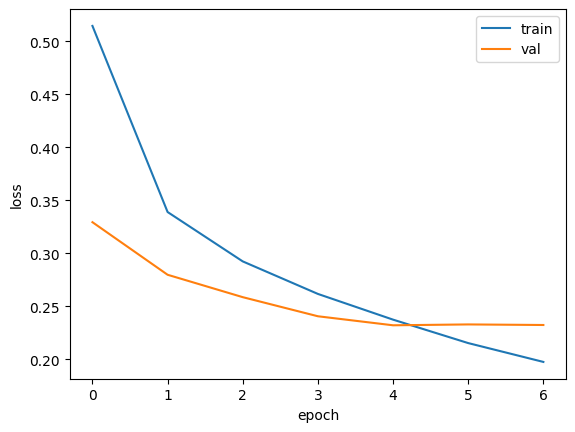

In [17]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

+ 결과를 보면 이전보다 좋아짐
+ 손실 그래프를 그려서 조기 종료가 잘 이루어졌는지 살펴보자



> 검증 셋트와 성능 평가



375/375 [==============================] - 6s 15ms/step - loss: 0.2322 - accuracy: 0.9133


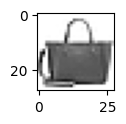

In [18]:
model.evaluate(val_scaled, val_target)

fig, axs = plt.subplots(1, 1, figsize = (1,1))
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [19]:
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 [==============================] - 0s 142ms/step
[[5.9413634e-11 8.6800255e-18 1.3187833e-13 1.2650803e-12 6.2545200e-13
  1.1961160e-10 1.6222208e-13 2.7780974e-12 1.0000000e+00 5.5041223e-12]]


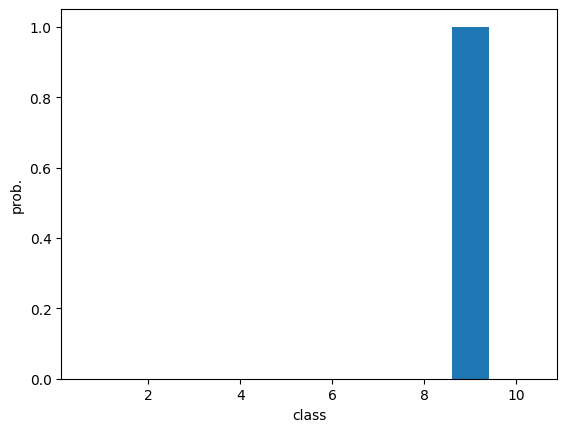

In [20]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [21]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트',
           '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [22]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [23]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 4s 11ms/step - loss: 0.2447 - accuracy: 0.9111


[0.24473781883716583, 0.9110999703407288]